In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("names.txt","r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
#build the vocabulary of characters and mappings to/form integers
chars=sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
#build the dataset
    
block_size = 3
X,Y = [],[]
for w in words:
    #print("\n\n"+w)
    context = [0]*block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:]+[ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)
    

In [6]:
X.shape

torch.Size([228146, 3])

In [7]:
Y.shape

torch.Size([228146])

In [8]:
#build the dataset
 
def build_dataset(words):
    block_size = 3
    X,Y = [],[]
    for w in words:
        #print("\n\n"+w)
        context = [0]*block_size
        for ch in w+'.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:]+[ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr , Ytr = build_dataset(words[:n1])
Xdev , Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [9]:
C = torch.randn((27,2))
C

tensor([[-0.3180, -1.8183],
        [-0.3628,  1.0987],
        [ 0.1184, -0.1279],
        [ 0.2544, -1.5219],
        [ 0.2560, -0.4845],
        [-0.4812, -0.5172],
        [-0.2158, -1.3272],
        [ 0.4478, -0.8338],
        [ 0.8250,  0.9677],
        [-0.1496,  0.8728],
        [-0.4391,  0.2419],
        [ 0.4167, -0.7212],
        [-1.4451, -0.4055],
        [-0.6108,  0.5628],
        [-0.7402, -2.2544],
        [-1.4550, -0.0243],
        [ 0.8448,  1.0562],
        [ 0.2020,  0.0203],
        [-0.2973,  0.1061],
        [ 0.3426,  0.7916],
        [ 1.0461,  0.3871],
        [ 0.6111, -1.0064],
        [-0.2679,  0.9292],
        [ 0.7866,  0.3807],
        [ 0.4841, -1.4623],
        [ 0.2188,  0.3872],
        [-2.0868, -0.9311]])

In [10]:
C[5]

tensor([-0.4812, -0.5172])

In [11]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.4812, -0.5172])

In [12]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [13]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [14]:
h = torch.tanh(emb.view(-1,6) @W1+b1)

In [15]:
h

tensor([[-0.9959,  0.9783,  0.9822,  ..., -0.4461,  0.5109, -0.0633],
        [-0.9956,  0.9669,  0.9963,  ..., -0.9907, -0.4197,  0.7057],
        [-0.8344,  0.9853,  0.9946,  ..., -0.9996, -0.8855,  0.9673],
        ...,
        [-0.2707,  1.0000,  0.9989,  ..., -0.9996,  0.5803,  0.9965],
        [-1.0000,  0.9995, -0.9991,  ..., -0.9999, -0.7327,  0.9493],
        [ 0.7914,  0.0898,  0.9809,  ...,  0.8900,  0.8474,  0.2724]])

In [16]:
h.shape

torch.Size([228146, 100])

In [17]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [18]:
logits = h @ W2 + b2

In [19]:
counts = logits.exp()

In [20]:
prob = counts/counts.sum(1, keepdims=True)

In [21]:
prob.shape

torch.Size([228146, 27])

In [22]:
#Now made respectable

In [34]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [35]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,500),generator=g)
b1 = torch.randn(500,generator=g)
W2 = torch.randn((500,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

In [36]:
sum(p.nelement() for p in parameters)

29297

In [37]:
for p in parameters:
    p.requires_grad = True

In [38]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [39]:
lri=[]
lossi=[]
stepi = []

In [40]:

for i in range(100000):
    #print(i,end=", ")
    #forward pass
    ix = torch.randint(0,Xtr.shape[0],(32,))
    emb = C[Xtr[ix]] # (32,3,2)
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    #counts = logits.exp()
    #prob = counts/counts.sum(1, keepdims=True)
    #loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits,Ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    #update
    #lr = lrs[i]
    lr = 0.05
    for p in parameters:
        p.data += -lr*p.grad
        
    #track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
    
print(loss.item())

2.65606427192688


In [41]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30)@W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3755, grad_fn=<NllLossBackward0>)

In [42]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30)@W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss


tensor(2.4723, grad_fn=<NllLossBackward0>)

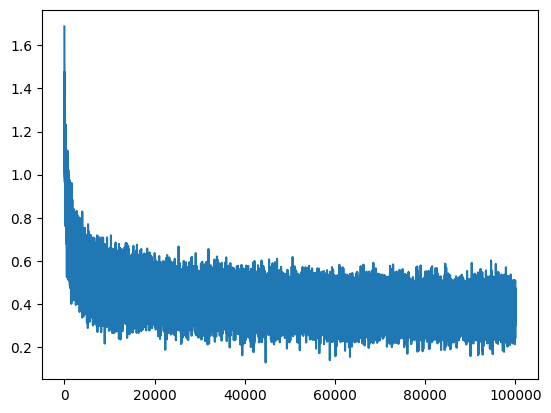

In [43]:
plt.plot(stepi,lossi)

In [47]:
# sample from the model
g = torch.Generator().manual_seed(2147483647+2990)
#g = torch.Generator().manual_seed(10)
for _ in range(50):
    out=[]
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if(ix==0):
            break
    print(''.join(itos[i] for i in out))

tarchla.
len.
floritd.
ernet.
leanit.
arettia.
ginleeyancir.
awo.
ana.
hile.
yamingyelian.
sarie.
flanisa.
garabe.
haryqobenjiliyann.
lan.
olaovi.
naniklieaniellah.
betty.
geabitana.
solaraliferettelleeliya.
brysto.
bmiga.
elan.
haurileyna.
gaylie.
arolyn.
brayla.
jianna.
seva.
lenie.
metom.
eleylin.
bow.
maria.
sya.
paylain.
rhan.
sahazley.
garistia.
emin.
quilin.
lharlutabrittara.
sandolphan.
gyana.
evik.
huar.
ima.
pariy.
zeyliyah.
